In [89]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [90]:
X, y = fetch_california_housing(return_X_y=True)

xtrainF, xtestF, ytrainF, ytestF = train_test_split(X, y, random_state=42 ,test_size=0.25)

xtrain, xvalid , ytrain , yvalid = train_test_split(xtrainF, ytrainF, random_state=42, test_size=0.25)

In [91]:
xtrain = StandardScaler().fit_transform(xtrain)
xvalid = StandardScaler().fit_transform(xvalid)
xtestF = StandardScaler().fit_transform(xtestF)

# Modelo wide e deep 

In [92]:
import keras
import tensorflow as tf

In [93]:
input_  = keras.layers.Input(shape=xtrain.shape[1:])
oculto1 = keras.layers.Dense(30, activation='relu')(input_)
oculto2 = keras.layers.Dense(30, activation='relu')(oculto1)
concat  = keras.layers.Concatenate()([input_,oculto2])
output  = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_],outputs=[output])

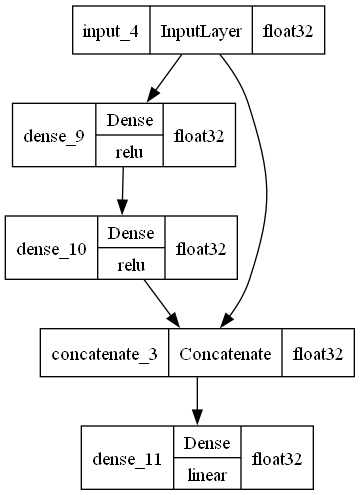

In [94]:
keras.utils.plot_model(
    model, to_file='img/ModelsWide&Deep.png', show_shapes=False, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True, show_trainable=False
)

In [95]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 30)                   270       ['input_4[0][0]']             
                                                                                                  
 dense_10 (Dense)            (None, 30)                   930       ['dense_9[0][0]']             
                                                                                                  
 concatenate_3 (Concatenate  (None, 38)                   0         ['input_4[0][0]',             
 )                                                                   'dense_10[0][0]']      

In [96]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    loss      = keras.losses.mean_squared_error,
)
history = model.fit(xtrain, ytrain, epochs=20, validation_data=(xvalid,yvalid), batch_size=32)

Epoch 1/20


363/363 [==============================] - 2s 3ms/step - loss: 2.2434 - val_loss: 0.8506
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7725 - val_loss: 0.6411
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6255 - val_loss: 0.6004
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5813 - val_loss: 0.5600
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5493 - val_loss: 0.5339
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5279 - val_loss: 0.5157
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5086 - val_loss: 0.5071
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4949 - val_loss: 0.4949
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4832 - val_loss: 0.4894
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4735 - val_loss: 0.4814
Epoch 11/2

In [97]:
model.evaluate(xtestF)

162/162 [==============================] - 0s 1ms/step - loss: 0.0000e+00


0.0

In [98]:
predict = model.predict(xtestF)

162/162 [==============================] - 0s 2ms/step


In [99]:
mean_absolute_error(ytestF,predict), mean_squared_error(ytestF, predict), r2_score(ytestF, predict)

(0.48236602129293593, 0.42885867907670244, 0.6758972103810039)

### Diversas entradas

In [100]:
xtrainA, xtrainB = xtrain[:,:5], xtrain[:,2:]
xvalidA, xvalidB = xvalid[:,:5], xvalid[:,2:]

xtestA, xtestB = xtestF[:,:5], xtestF[:,2:]

In [101]:
input_A = keras.layers.Input(shape=xtrainA.shape[1:], name='wideInput')
input_B = keras.layers.Input(shape=xtrainB.shape[1:], name='deepInput')

oculta1 = keras.layers.Dense(30, activation='relu', name='Camada_oculta1')(input_B)
oculta2 = keras.layers.Dense(30, activation='relu', name='Camada_oculta2')(oculta1)

concat = keras.layers.Concatenate(name='concat')([input_A,oculta2])

output = keras.layers.Dense(1, name='saida')(concat)

model = keras.Model(inputs=[input_A,input_B], outputs=[output])
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deepInput (InputLayer)      [(None, 6)]                  0         []                            
                                                                                                  
 Camada_oculta1 (Dense)      (None, 30)                   210       ['deepInput[0][0]']           
                                                                                                  
 wideInput (InputLayer)      [(None, 5)]                  0         []                            
                                                                                                  
 Camada_oculta2 (Dense)      (None, 30)                   930       ['Camada_oculta1[0][0]']      
                                                                                           

In [102]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=1e-3),
    loss      = keras.losses.mean_squared_error,
    metrics   = [keras.losses.mean_squared_error] 
    )
history =  model.fit((xtrainA, xtrainB) , ytrain, epochs=20, validation_data=((xvalidA,xvalidB),yvalid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.1215 - mean_squared_error: 2.1215 - val_loss: 0.8545 - val_mean_squared_error: 0.8545
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7950 - mean_squared_error: 0.7950 - val_loss: 0.7250 - val_mean_squared_error: 0.7250
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7065 - mean_squared_error: 0.7065 - val_loss: 0.6684 - val_mean_squared_error: 0.6684
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6562 - mean_squared_error: 0.6562 - val_loss: 0.6281 - val_mean_squared_error: 0.6281
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6174 - mean_squared_error: 0.6174 - val_loss: 0.5949 - val_mean_squared_error: 0.5949
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5852 - mean_squared_error: 0.5852 - val_loss: 0.5721 - val_mean_squared_error: 0.5721
Epoch 7/20
363/363 [========

<Axes: >

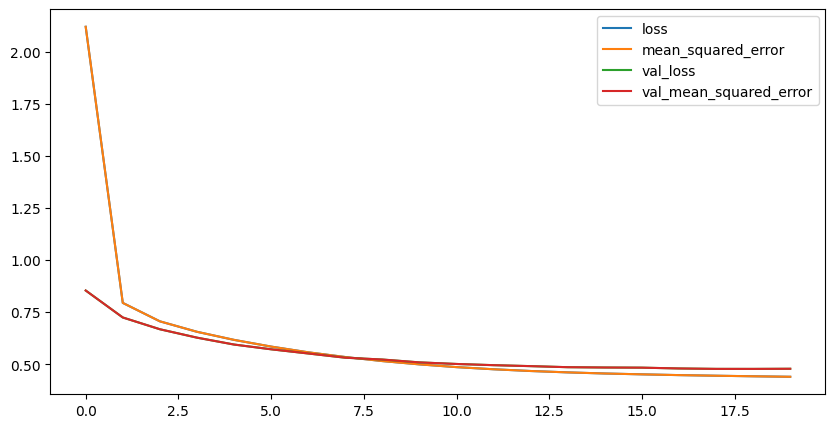

In [103]:
pd.DataFrame(history.history).plot(figsize=(10,5))

In [104]:
model.evaluate((xtestA,xtestB))

162/162 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - mean_squared_error: 0.0000e+00


[0.0, 0.0]

In [113]:
model.save('ModelSave/model_zero.keras')

In [106]:
predict = model.predict((xtestA,xtestB))

162/162 [==============================] - 0s 2ms/step


In [107]:
mean_absolute_error(ytestF,predict), mean_squared_error(ytestF, predict), r2_score(ytestF, predict)

(0.4916146290173493, 0.4414859978962177, 0.6663543249166728)

### adicionar uma saida para regularização

In [108]:
input_A = keras.layers.Input(shape=xtrainA.shape[1:], name='wideInput')
input_B = keras.layers.Input(shape=xtrainB.shape[1:], name='deepInput')

oculta1 = keras.layers.Dense(30, activation='relu', name='Camada_oculta1')(input_B)
oculta2 = keras.layers.Dense(30, activation='relu', name='Camada_oculta2')(oculta1)

concat = keras.layers.Concatenate(name='concat')([input_A,oculta2])

output = keras.layers.Dense(1, name='saidaPrincipal')(concat)
auxoutput = keras.layers.Dense(1, name='saidaAuxiliar')(oculta2)
model = keras.Model(inputs=[input_A,input_B], outputs=[output,auxoutput])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deepInput (InputLayer)      [(None, 6)]                  0         []                            
                                                                                                  
 Camada_oculta1 (Dense)      (None, 30)                   210       ['deepInput[0][0]']           
                                                                                                  
 wideInput (InputLayer)      [(None, 5)]                  0         []                            
                                                                                                  
 Camada_oculta2 (Dense)      (None, 30)                   930       ['Camada_oculta1[0][0]']      
                                                                                           

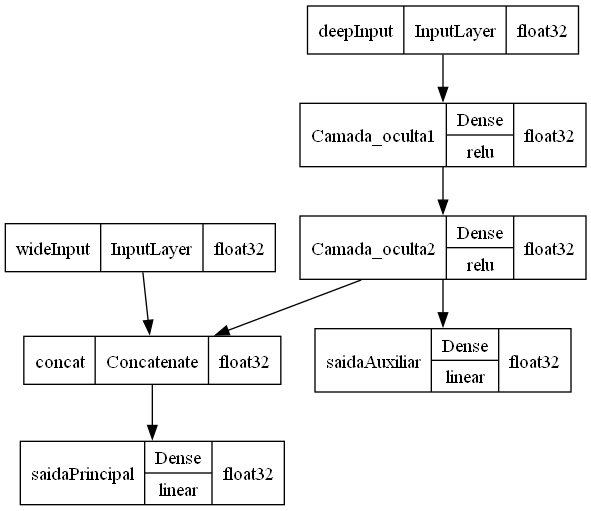

In [109]:
keras.utils.plot_model(
    model, to_file='img/ModelAux.png', show_shapes=False, show_dtype=True,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96,
    layer_range=None, show_layer_activations=True, show_trainable=False
)

In [110]:
model.save('ModelSave/model.keras')

# Reload Model

In [131]:
model0 = keras.saving.load_model('ModelSave/model_zero.keras')